# B4 Методы визуализации данных 

Основную часть упражнений модуля мы будем выполнять на примере датасета, содержащего информацию о посещениях одного из ресторанов быстрого питания в США в начале 90-х годов. Скачайте файл для работы и загрузите датасет.

Напишите максимальную сумму счёта в датафрейме. 

In [1]:
import pandas as pd 
df = pd.read_csv(r'C:\Users\kozhevnikovams\Downloads\tips.csv')
maxbill = df['total_bill'].max()
display(maxbill)

50.81

In [2]:
%matplotlib inline

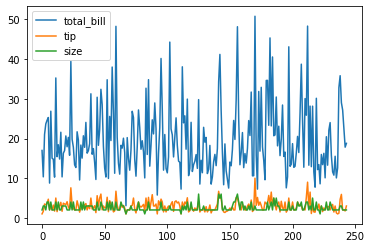

In [3]:
df.plot()

Если применить метод plot не ко всему датафрейму, а только к одному столбцу, а в качестве одного из параметров указать тип диаграммы (например, тип hist), то мы получим гистограмму распределения признака

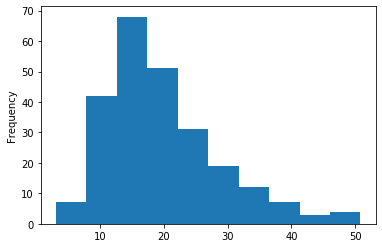

In [4]:
df['total_bill'].plot(kind = 'hist')

Добавление параметров grid и title

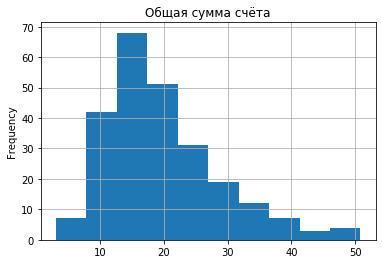

In [5]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

Для работы с категориальными (нечисловыми) переменными с помощью метода hist датафрейм необходимо предварительно обработать. Например, если мы хотим увидеть распределение посетителей по дням недели, нужно предварительно посчитать, сколько заказов пришлось на каждый из дней недели. Сделать это можно с помощью метода value_counts(), а уже к получившемуся датафрейму применить метод plot. Тип графика, который мы будем использовать в этом случае, — bar (столбчатая диаграмма). Чтобы все столбцы были одного цвета, введём параметр colormap со значением coolwarm

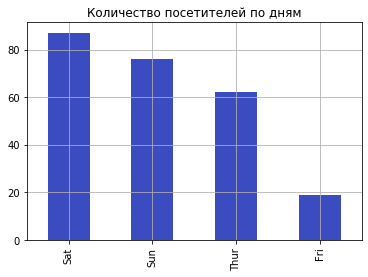

In [6]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

Метод plot позволяет использовать параметр subplots, который принимает логические значения True или False. При установке значения True можно разместить несколько графиков в одной рабочей области:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001658A6CE1C8>,
      dtype=object)

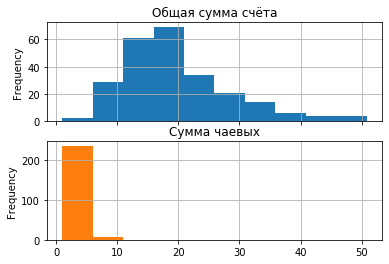

In [7]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

Такой вариант отображения графиков показывает, в каких пределах изменяются оба признака, но ничего не говорит о том, есть ли какая-то связь между суммой по счёту и суммой чаевых. Для получения такой информации мы можем построить график типа scatter plot:

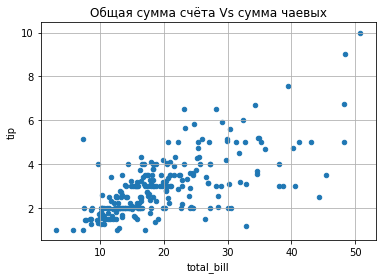

In [8]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

Если нам нужно совместить на графике несколько качественных и количественных показателей, то датафрейм следует предварительно обработать. Например, если мы хотим отобразить средние значения суммы счёта и размера чаевых по дням недели, то потребуется такой код:

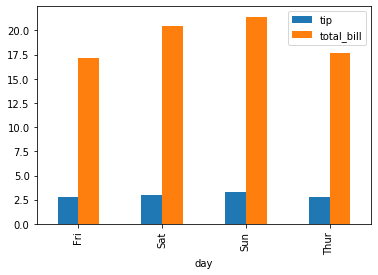

In [9]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

Импортируйте необходимые библиотеки, включая модуль pyplot библиотеки Matplotlib, который содержит необходимые функции и методы. Для корректного отображения графиков в ноутбуке вставьте команду %matplotlib inline. Загрузите файл tips.csv.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r'C:\Users\kozhevnikovams\Downloads\tips.csv')

Процесс работы над графиком начинается с создания объекта, содержащего необходимую информацию и настройки. К этому объекту мы будем добавлять координатную плоскость и другие графические объекты. В первой строке кода создаётся объект с именем fig, к которому применяются все настройки. Во второй строке создается координатная плоскость (axes), которая начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает все отведенное место в области (ширина и высота равны 1).

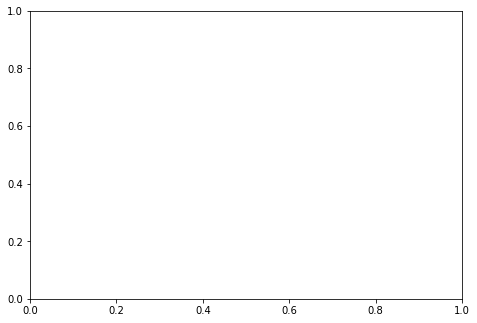

In [11]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])

Построение гистограммы распределения признака «Общая сумма счёта» 

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

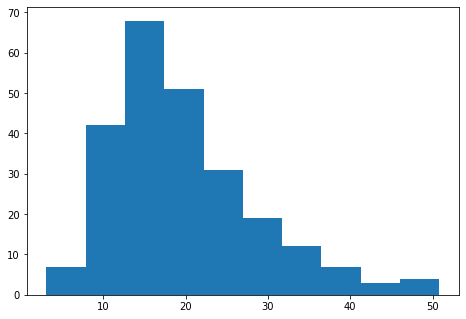

In [12]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

У метода hist можно менять цвет диаграммы (color) и увеличивать количество столбцов для демонстрации распределения (bins).К графику можно добавить заголовки:

    axes.set_title — заголовок диаграммы;
    axes.set_ylabel — заголовок для оси ординат;
    axes.set_xlabel — заголовок для оси абсцисс.

Text(0.5, 0, 'Сумма заказа, USD')

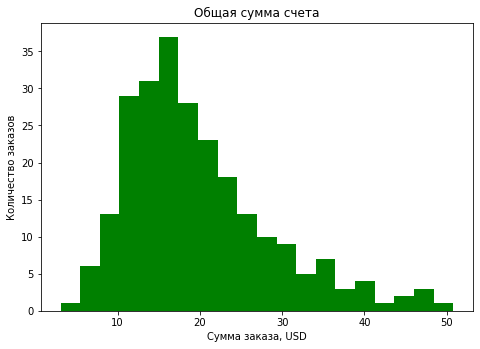

In [13]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Для размещения на координатной плоскости графиков других видов, необходимо вызывать соответствующие методы применительно к объекту axes.

Text(0, 0.5, 'Размер чаевых')

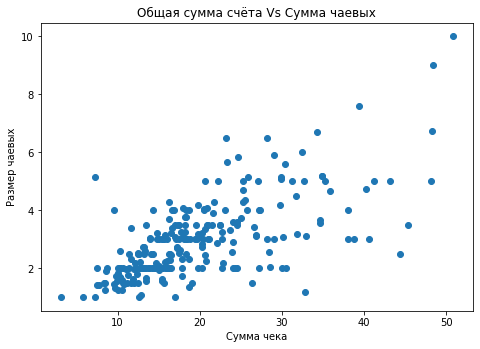

In [14]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

Мы можем размещать несколько систем координат на одном объекте, что позволит нам отображать вспомогательную информацию на основном графике. Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Первые два числовых параметра, указанные при создании систем координат, — это отступ снизу и слева, а следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

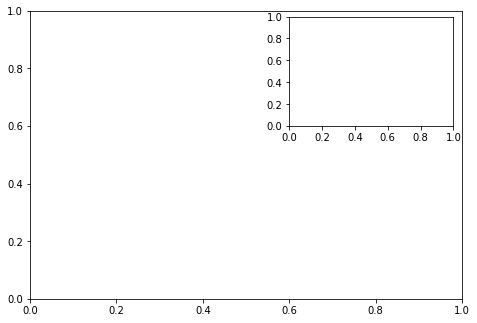

In [15]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])

Датафрейм, содержащий информацию о минимальной и максимальной сумме счёта по дням недели:

In [16]:
tips_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

Для размещения каждого графика применим соответствующий метод к объекту, представляющему нужную нам систему координат: 

к объекту main_axes применим метод hist;
для объекта insert_axes используем метод bar.

<BarContainer object of 4 artists>

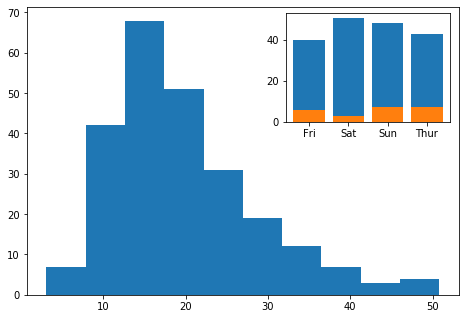

In [17]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'])

Настраиваем метод bar, чтобы столбцы не перекрывали друг друга

<BarContainer object of 4 artists>

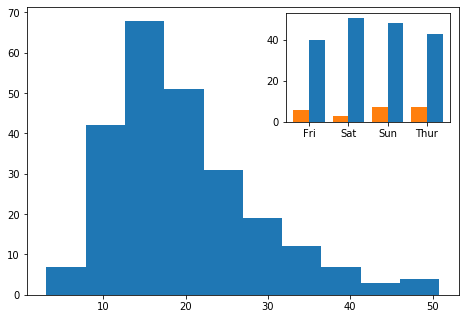

In [18]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge')

Добавим на график легенду при помощи метода legend к объекту axes. Для корректного отображения данных в легенде необходимо добавить параметр label. Место размещения легенды на координатной плоскости задаётся с помощью параметра loc:

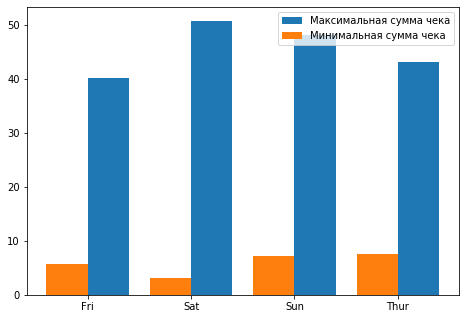

In [19]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
         width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
         width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

Чтобы легенда не перекрывала часть данных, увеличиваем максимальное значение оси ординат с помощью метода set_ylim к объекту axes:

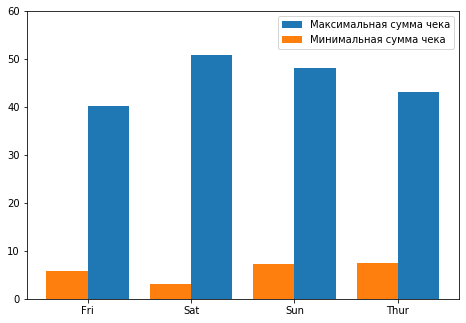

In [20]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], width = 0.4, align = 'edge', label = "Максимальная сумма чека")
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], width = -0.4, align = 'edge', label = "Минимальная сумма чека")
axes.legend(loc = 1)

Разместить в одном пространстве несколько графиков можно и с помощью метода subplots. В параметрах фигуры необходимо указать количество строк и столбцов, в которых будут размещаться графики. При желании можно задать размер фигуры в дюймах (ширина*высота):

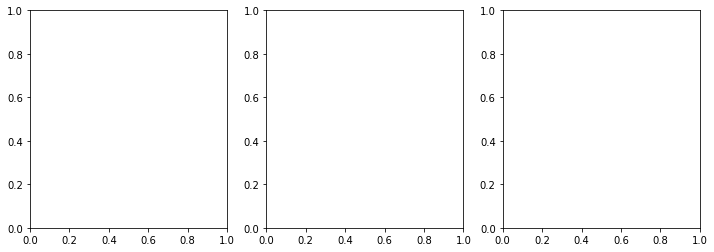

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

После выполнения кода переменная axes содержит список, состоящий из трех объектов. Обращаться к элементам списка можно по индексам (от 0 до 2):

Text(0.5, 1.0, 'Общая сумма счёта Vs Cумма чаевых')

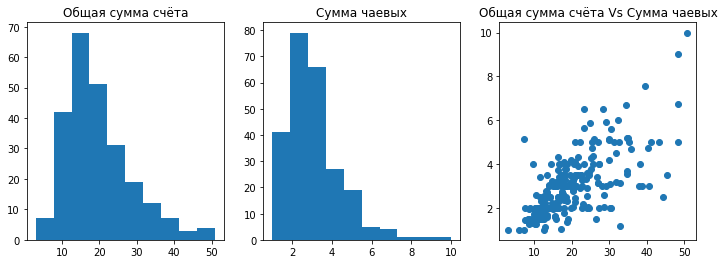

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].hist(df['total_bill'])
axes[0].set_title('Общая сумма счёта')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes[2].set_title('Общая сумма счёта Vs Cумма чаевых')

Для выполнения заданий этого блока мы будем использовать не датасет, а специально сгенерированный одномерный массив NumPy. Для генерации массива нам необходимо импортировать библиотеку NumPy:

In [23]:
import numpy as np 

Теперь сгенерируем массив из 1000 чисел, равномерно распределённых в интервале от -3 до 3. Также создадим переменную, содержащую значения функции e^x на отрезке [-3, 3]:

In [24]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

Функция matplotlib.pyplot.plot позволяет отрисовать последовательность значений — первым аргументом подается последовательность чисел аргумента, вторым — последовательность значений функции для каждого аргумента:

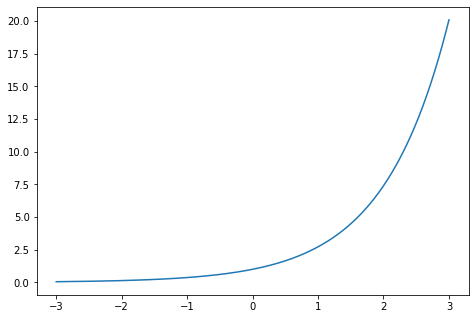

In [25]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

Функцию plot можно вызвать несколько раз для отрисовки дополнительного контента. В таком случае отрисовка выполнится в том же matplotlib.pyplot.figure, который в данном случае создался автоматически при первой отрисовке. Для примера добавим к нашему графику какой-нибудь полином третьей степени:

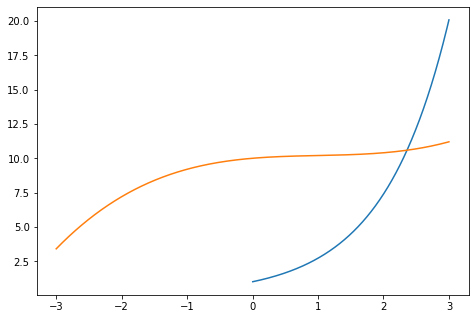

In [26]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3


fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

Отрисуем линию в стиле "dashed line":

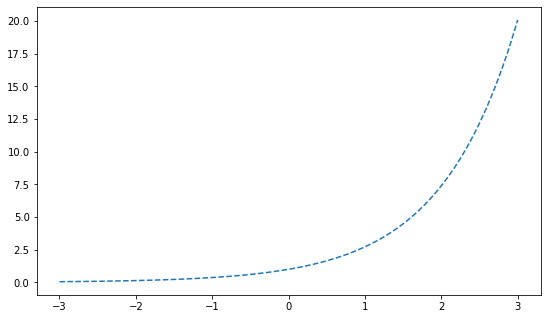

In [27]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')

Отрисуем линию в фиолетовом цвете ('m' — magenta) с маркером ромба ('D' — diamond marker).

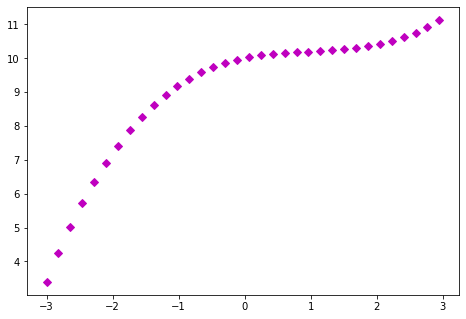

In [28]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

In [29]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

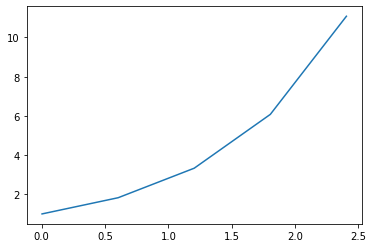

In [30]:
plt.plot(x[500::100], y1[500::100]) 

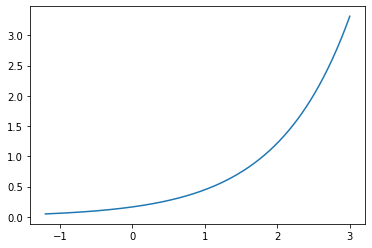

In [31]:
plt.plot(x[300:], y1[:700]) 

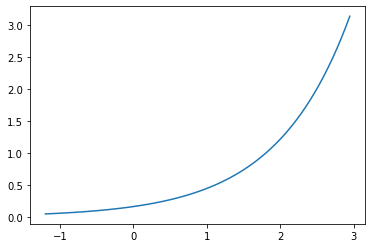

In [32]:
plt.plot(x[300::10], y1[:700:10]) 

Импортируем библиотеки Seaborn, Matplotlib и Pandas для работы с датафреймами и корректного отображения информации в jupyter notebook:

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

При использовании некоторых методов Seaborn система может выдавать предупреждающие сообщения, что метод применяется к определенному типу данных. Эти предупреждения не являются сообщениями об ошибках, их можно игнорировать и отключить выведение на экран:

In [34]:
import warnings; warnings.simplefilter('ignore')

In [35]:
df = pd.read_csv(r'C:\Users\kozhevnikovams\Downloads\tips.csv')

Для построения гистограммы распределения количественных признаков в библиотеке Seaborn используется метод distplot. Перед применением метода установим стандартные параметры отображения графиков с помощью команды sns.set():

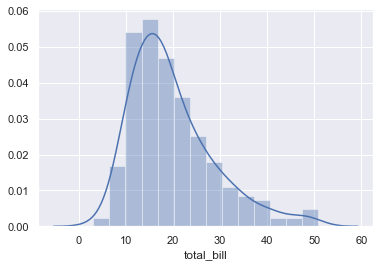

In [36]:
sns.set()
sns.distplot(df['total_bill'])

Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними. Тип графика, используемый для этого, называется jointplot:

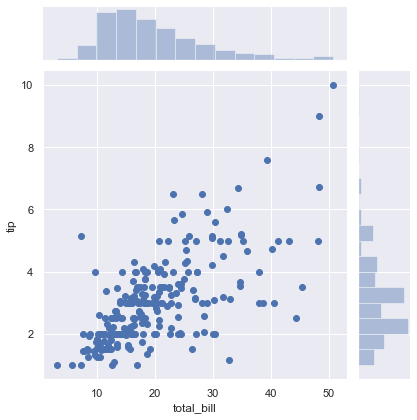

In [37]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df)

Характер представления информации в центральной части графика можно регулировать с помощью параметра kind. Например, kind = 'reg' выводит на экран не только точки, представляющие данные об отдельных посещениях ресторана, но и линию регрессии, выражающую общий характер связи между двумя величинами:

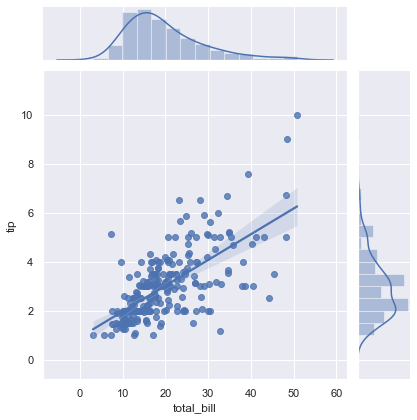

In [38]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')

Другой быстрый и наглядный способ отобразить гистограммы распределения количественных признаков и особенности связей между ними — построить график типа pairplot.

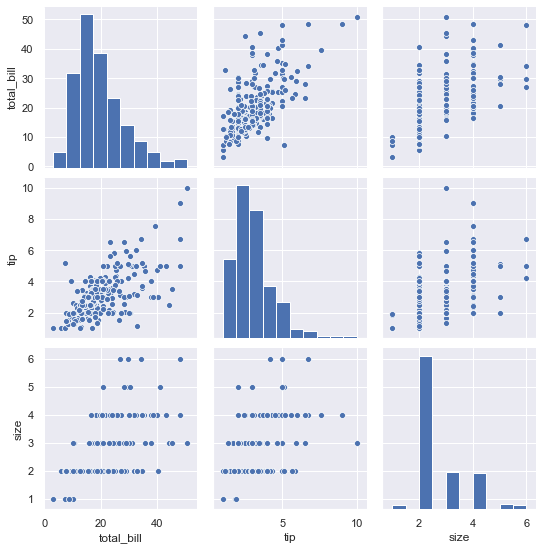

In [39]:
sns.pairplot(df)

Для отображения информации о качественных признаках на диаграммах по методам библиотек Pandas и Matplotlib приходится предварительно обрабатывать датафрейм, группируя нужные данные. В Seaborn такой проблемы нет: при построении графиков можно обращаться к столбцам с категориальными признаками напрямую. Для построения гистограммы распределения категориального признака можно воспользоваться методом countplot:

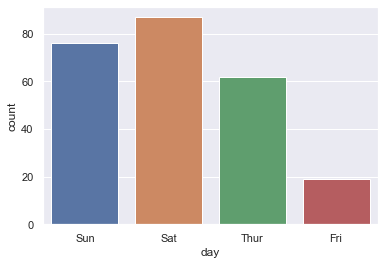

In [40]:
sns.countplot(x = 'day', data = df)

Категориальные значения при построении графиков можно использовать в качестве одного из параметров метода barplot. Он позволяет разделить датафрейм на группы в зависимости от значения категориальной переменной. По умолчанию для каждой группы вычисляется среднее значение заданной количественной переменной. Вместо среднего значения можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре estimator.

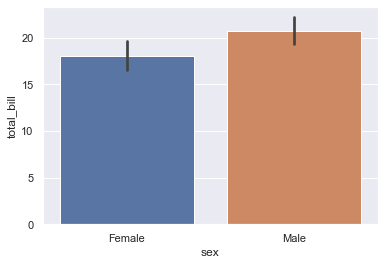

In [41]:
sns.barplot(x = 'sex', y = 'total_bill', data = df)

Box plot — тип графика, компонентами которого являются:

Отрезок (Range), отражающий диапазон значений набора данных

Прямоугольник (Box) — отображает границы основного объема данных. Левой границей считается значение 25%-ый квантиля, или Q1, первый квартал. Правой границей является 75%-ый квантиль, или Q3, третий квартал)

Усы (whiskers) — отметки на оси, представляющие левый и правый "крайние" значения данных. Фактически эти значения не всегда являются минимумом или максимумом набора. Они представляют значения, отстоящие на 1.5

Выбросы (Outliers) — значения, находящиеся за левым и правым "крайними" значениями на оси


Для создания графиков такого типа в Seaborn используется метод boxplot. Он позволяет отобразить распределение заданного количественного признака по категориям, которые определяются значением заданного качественного признака. На диаграмме ниже показывается, как менялась сумма чаевых в зависимости от дня недели:

Еще один способ увеличения информативности методов Seaborn — использование параметра hue. Он позволяет дополнительно разделять отображаемые данные в зависимости от значения нового категориального признака. Посмотрите, как меняется отображение boxplot при добавлении параметра hue:

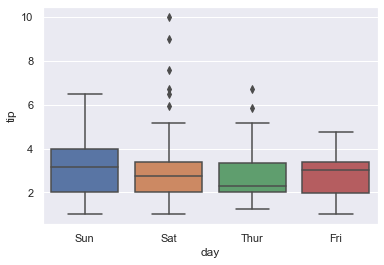

In [42]:
sns.boxplot(x = 'day', y = 'tip', data = df)

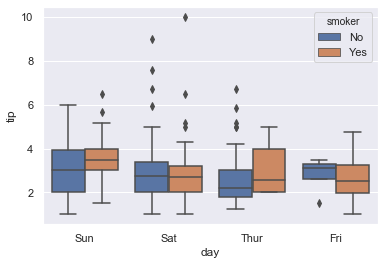

In [43]:
sns.boxplot(x = 'day', y = 'tip', data = df, hue = 'smoker')

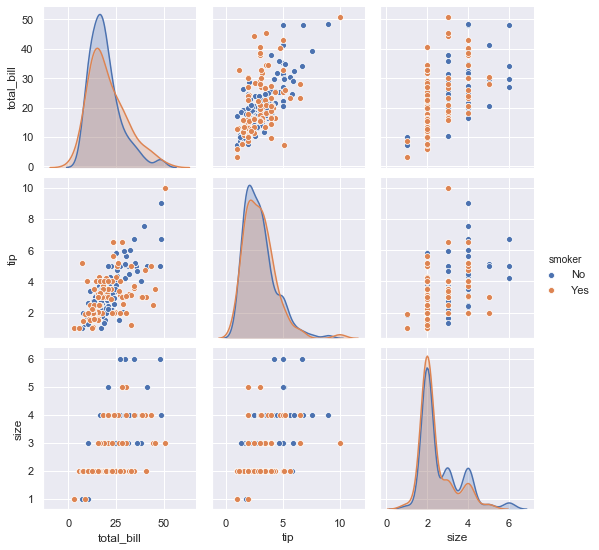

In [44]:
sns.pairplot(df, hue = 'smoker')

Графики табличного типа

Степень связи между двумя величинами в Seaborn помогает оценить корреляционный анализ. Величина степени связи (коэффициент корреляции) может меняться от -1 до +1: чем ближе абсолютное значение коэффициента к единице, тем сильнее связь между признаками.

Для отображения информации о результатах корреляционного анализа в Seaborn часто используются тепловые карты (heatmap).  Рассмотрим, как создать такую карту. Сначала вычислим коэффициенты корреляции между количественными признаками, содержащимися в датафрейме, с помощью метода corr(). Результат вычислений сохраним в новом датафрейме correlation:

In [45]:
correlation = df.corr()

Теперь мы можем передать созданный датафрейм с коэффициентами в качестве одного из параметров метода heatmap. Для отображения в тепловой карте значений коэффициентов корреляции зададим параметр annot = True. Для использования более ярких цветов при заливке ячеек применяем цветовую палитр

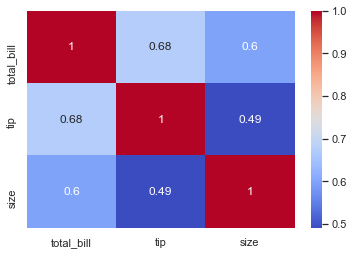

In [46]:
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [47]:
!pip install plotly

In [48]:
!pip install cufflinks

In [49]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [50]:
init_notebook_mode(connected = True)
cf.go_offline()

In [51]:
df = pd.read_csv(r'C:\Users\kozhevnikovams\Downloads\tips.csv')

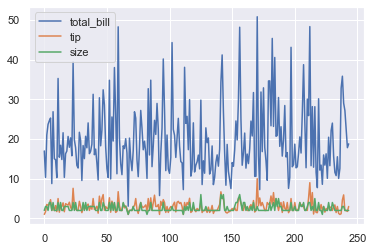

In [52]:
df.plot()

In [53]:
df.iplot()

Функции графика, созданного методом iplot:

    получение в интерактивном режиме значения признака в отдельных точках;
    регулирование отображения конкретных признаков (отключать и включать данные признаки без изменения кода);
    увеличение фрагмента графика;
    сохранение полученного графика в формате png напрямую из jupyter notebook.

Как и при работе с методом plot в библиотеке Pandas, при изменении параметров метода iplot можно изменять тип и другие особенности диаграммы. Plotly позволяет создавать новые виды графиков. Например, этот тип графика позволяет не только показать на одной координатной плоскости сумму чека и размер чаевых для каждого заказа, но и демонстрирует, как изменяется разность между этими двумя суммами для разных заказов:

In [54]:
df[['total_bill','tip']].iplot(kind = 'spread')

Bubblechart — разновидность диаграммы рассеяния (scatterplot), в которой используются три параметра. Третий параметр влияет на размер маркера, который показывает связь между значениями переменных, отложенных на оси абсцисс и оси ординат:

In [55]:
df.iplot(kind = 'bubble', x = 'total_bill', y = 'size', size ='tip')